<a href="https://colab.research.google.com/github/preethamsai696/SmartKnower-Projects-/blob/master/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns

In [127]:
df = pd.read_csv('redwine_quality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# **Data Analysis**

In [128]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [129]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [130]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [131]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

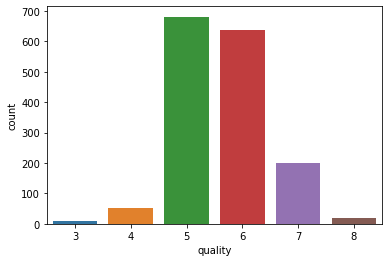

In [132]:
sns.countplot('quality',data=df)

In [133]:
# Correlation of input features wrt Target Feature 
df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

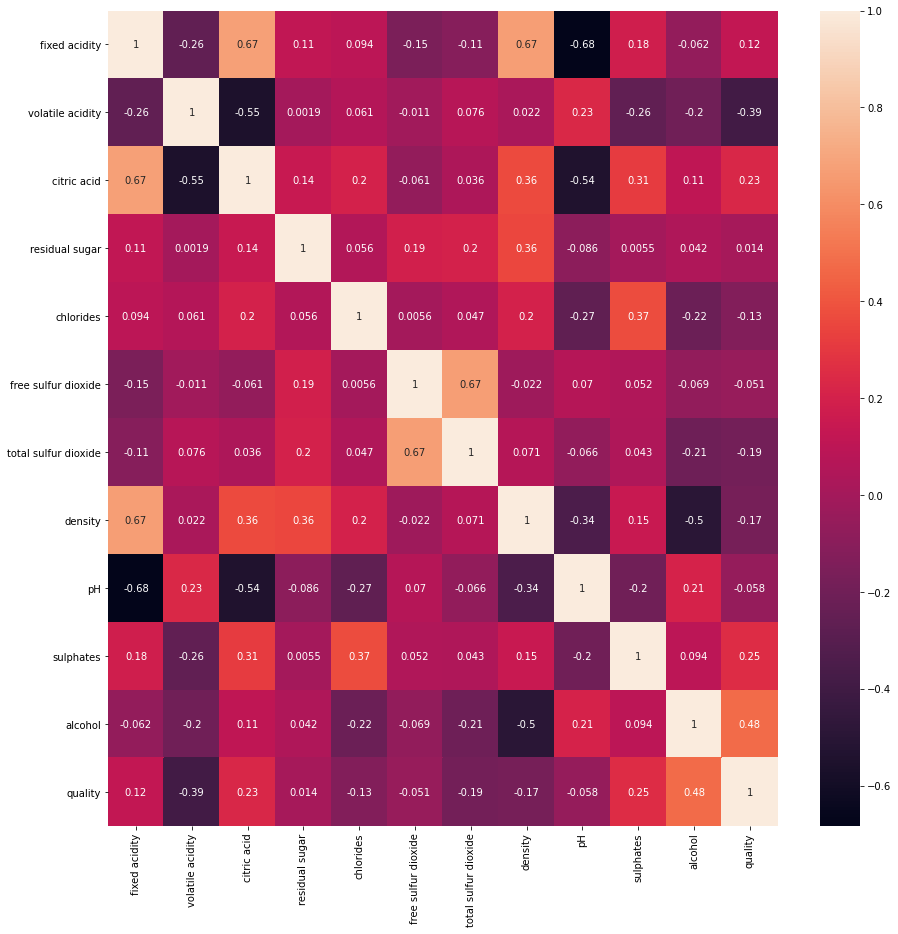

In [134]:
# To Visualize the Correlation among the Features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

# **Feature Selection**

In [136]:
x = df.drop('quality',axis=1)
y = df['quality'].values

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit= bestfeatures.fit(x,y)

# Scores
dfscore = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(x.columns)
dsf = pd.concat([dfcol,dfscore],axis=1)
dsf.columns = ['Features','Score']
dsf

,Features,Score
0,fixed acidity,11.260652
1,volatile acidity,15.580289
2,citric acid,13.025665
3,residual sugar,4.123295
4,chlorides,0.752426
5,free sulfur dioxide,161.936036
6,total sulfur dioxide,2755.557984
7,density,0.000230
8,pH,0.154655
9,sulphates,4.558488


In [137]:
# Selection 10 best features based on the obtained score
print(dsf.nlargest(10,'Score'))

                Features        Score
6   total sulfur dioxide  2755.557984
5    free sulfur dioxide   161.936036
10               alcohol    46.429892
1       volatile acidity    15.580289
2            citric acid    13.025665
0          fixed acidity    11.260652
9              sulphates     4.558488
3         residual sugar     4.123295
4              chlorides     0.752426
8                     pH     0.154655


In [138]:
# Selecting the obtained best features
x1 = df.drop('density',axis=1)
y = df['quality'].values

# **Handling imbalanced Dataset**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

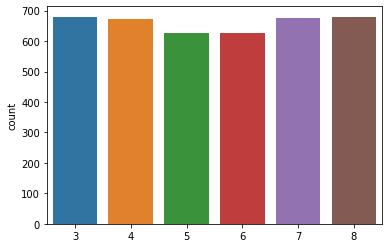

In [139]:
# As the Data Set is imbalanced we use Oversampling Technique to convert it into equal samples :

from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=5)
x_res,y_res = smk.fit_sample(x1,y)

# Balanced Target Feature
sns.countplot(y_res,data=df)

# **Machine Learning model**

In [140]:
# Train-Test-Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=5)

from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

# **Evaluation Metrics** 

In [142]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(f" Accuracy Score : {accuracy_score(y_test,y_predict)} ")
print('\n')

# Classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

# Using CrossValidation 
from sklearn.model_selection import cross_val_score
print(f"Cross Validation Score : {cross_val_score(model,x_res,y_res,cv=12).mean()} ")

 Accuracy Score : 1.0 


              precision    recall  f1-score   support

           3       1.00      1.00      1.00       130
           4       1.00      1.00      1.00       127
           5       1.00      1.00      1.00       147
           6       1.00      1.00      1.00       117
           7       1.00      1.00      1.00       133
           8       1.00      1.00      1.00       138

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792

Cross Validation Score : 0.9992424242424242 


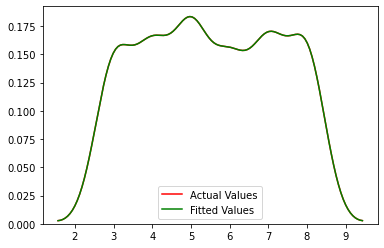

In [143]:
# Distribution Plot

ax1 = sns.distplot(y_test, hist=False, color='r',label='Actual Values')
sns.distplot(y_predict, hist=False, color='g', label= 'Fitted Values', ax=ax1)